In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# Reading the collected data 

In [2]:
Bank=pd.read_csv('Bank.csv')

In [3]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
Bank.shape

(11162, 17)

# Data Pre-processing

# Feature Engineering and Reduction

- handling missing value,outliner detection and handling,encoding scaling all comes under feature engineering.

In [5]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
Bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Split the categorical and continuos features
categorical_coln = Bank.select_dtypes('object')
numerical_coln = Bank.select_dtypes('number')

In [8]:
categorical_coln

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [9]:
for NAN in categorical_coln:
    print('The count of unique values in {} is\n{}  '.format(NAN,categorical_coln[NAN].value_counts()))
    print('------------------------------------')

The count of unique values in job is
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64  
------------------------------------
The count of unique values in marital is
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64  
------------------------------------
The count of unique values in education is
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64  
------------------------------------
The count of unique values in default is
no     10994
yes      168
Name: default, dtype: int64  
------------------------------------
The count of unique values in housing is
no     5881
yes    5281
Name: housing, dtype: int64  
------------------------------------
The count of unique values 

# Missing Values

## In the dataset the missing values are given as Unknown values

- There are 70 unknown values in Job
- There are 497 unknown values in Education
- There are 2346 unknown values in contact 
- There are 8326 unknown values in poutcome 

<AxesSubplot:xlabel='job', ylabel='count'>

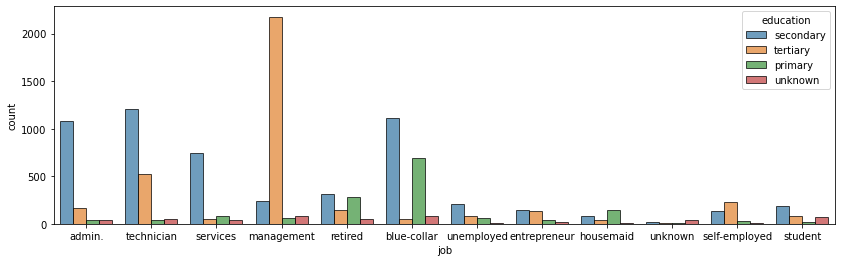

In [10]:
plt.figure(figsize=[14,4])
sns.countplot(x='job',hue='education',edgecolor="black", alpha=0.7, data=Bank)

<AxesSubplot:xlabel='education', ylabel='count'>

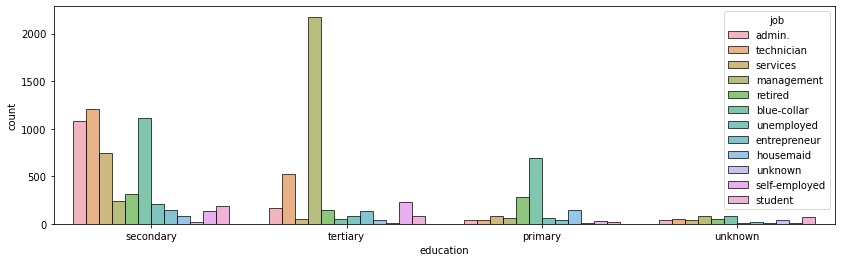

In [11]:
plt.figure(figsize=[14,4])
sns.countplot(x='education',hue='job',edgecolor="black", alpha=0.7, data=Bank)

In [12]:
Bank.groupby('job')['education'].value_counts()


job            education
admin.         secondary    1084
               tertiary      168
               primary        42
               unknown        40
blue-collar    secondary    1116
               primary       694
               unknown        86
               tertiary       48
entrepreneur   secondary     141
               tertiary      132
               primary        41
               unknown        14
housemaid      primary       144
               secondary      78
               tertiary       43
               unknown         9
management     tertiary     2178
               secondary     238
               unknown        84
               primary        66
retired        secondary     314
               primary       277
               tertiary      140
               unknown        47
self-employed  tertiary      230
               secondary     136
               primary        28
               unknown        11
services       secondary     746
               pri

In [13]:
job=list(Bank['job'].unique())
job.remove('unknown')
print(Bank['education'].value_counts())
for j in job:
    k=Bank[Bank['job']== j][['education']].mode()
    Bank.loc[(Bank['job'] == j)&(Bank['education']=='unknown'), "education"] = k['education'].iloc[0]
Bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


secondary    5830
tertiary     3784
primary      1509
unknown        39
Name: education, dtype: int64

In [14]:
Bank.groupby('job')['education'].value_counts()


job            education
admin.         secondary    1124
               tertiary      168
               primary        42
blue-collar    secondary    1202
               primary       694
               tertiary       48
entrepreneur   secondary     155
               tertiary      132
               primary        41
housemaid      primary       153
               secondary      78
               tertiary       43
management     tertiary     2262
               secondary     238
               primary        66
retired        secondary     361
               primary       277
               tertiary      140
self-employed  tertiary      241
               secondary     136
               primary        28
services       secondary     787
               primary        83
               tertiary       53
student        secondary     256
               tertiary       83
               primary        21
technician     secondary    1261
               tertiary      521
               pri

In [15]:
edu=list(Bank['education'].unique())
edu.remove('unknown')
print(Bank['job'].value_counts())
for j in edu:
    k=Bank[Bank['education']== j][['job']].mode()
    Bank.loc[(Bank['education'] == j)&(Bank['job']=='unknown'), "job"] = k['job'].iloc[0]
Bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


management       2575
blue-collar      1951
technician       1838
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            39
Name: job, dtype: int64

- Replaced most of the Job and Education columns using mode function.
There are only total 39 unknown values in common in both the columns

## Outliners detection and Handling

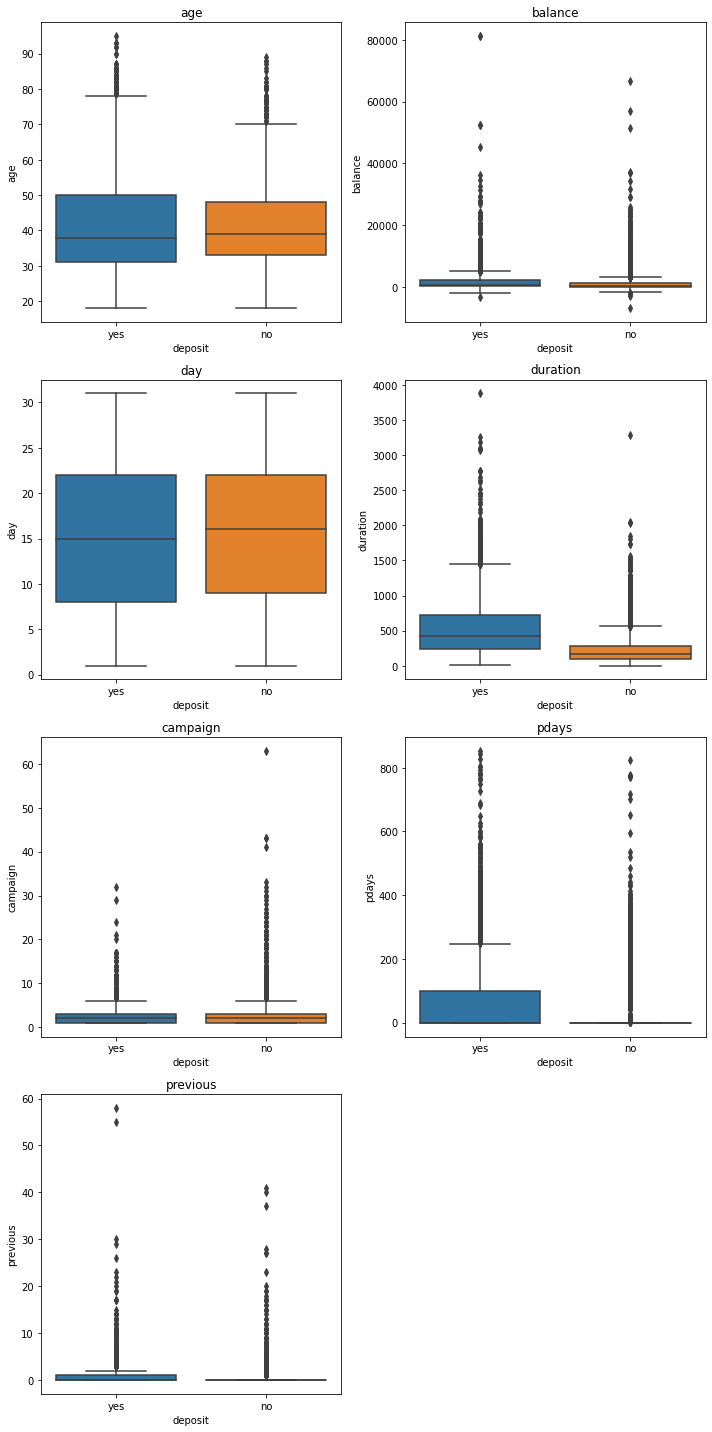

In [16]:
  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,20))

for i in numerical_coln:
    plt.subplot(4, 2, c)
    plt.title('{}'.format(i))
    
    sns.boxplot(x=Bank['deposit'],y = numerical_coln[i])
    c = c + 1

plt.tight_layout()
plt.show()

In [17]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


- We could find that the Even if there are outliners in age column, the maximum age  95 and min age  18  can be an expected age according to the domain knowledge. Customers of 18 yrs to 95 yrs can have a term deposit. Hence we are not removing the outliners of Age.
-  we can ignore the outliners of Balance as it can vary according to the cutomers according to the domain knowledge.

- Since it it a very large dataset, it is likely to get more outliners. So instead of dropping all the outliners we have calculated the quantile and only dropped outliners with huge difference in previous and campaign column

<AxesSubplot:xlabel='count', ylabel='previous'>

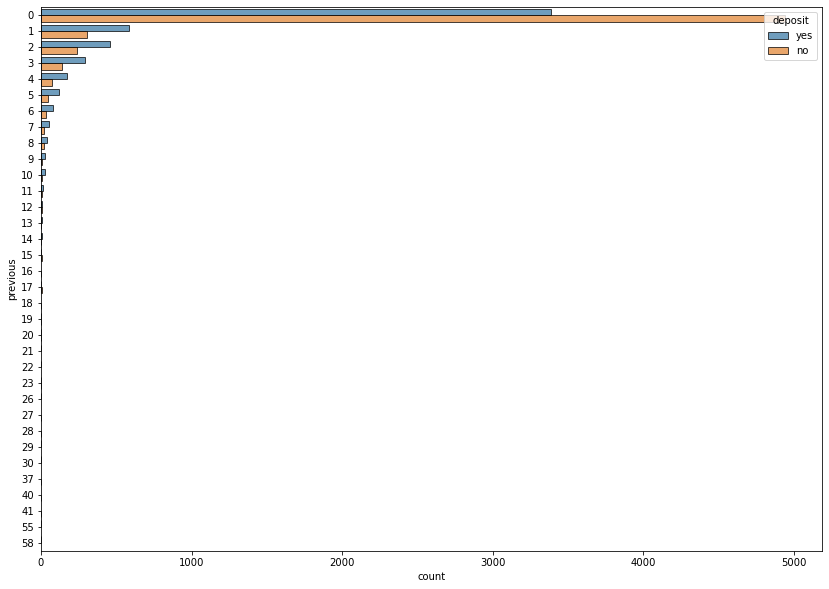

In [18]:
plt.figure(figsize=[14,10])
sns.countplot(y='previous',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

In [19]:
maxi=Bank['previous'].quantile(0.995)
maxi

13.0

In [20]:
d=Bank[Bank['previous']>maxi]
ind=d.index

In [21]:
Bank.drop(ind, inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:xlabel='count', ylabel='previous'>

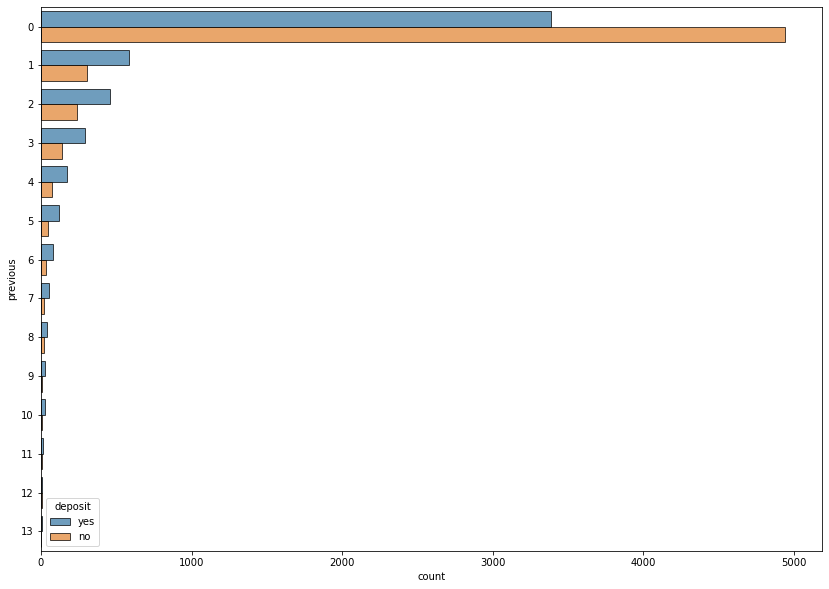

In [22]:
plt.figure(figsize=[14,10])
sns.countplot(y='previous',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

<AxesSubplot:xlabel='count', ylabel='campaign'>

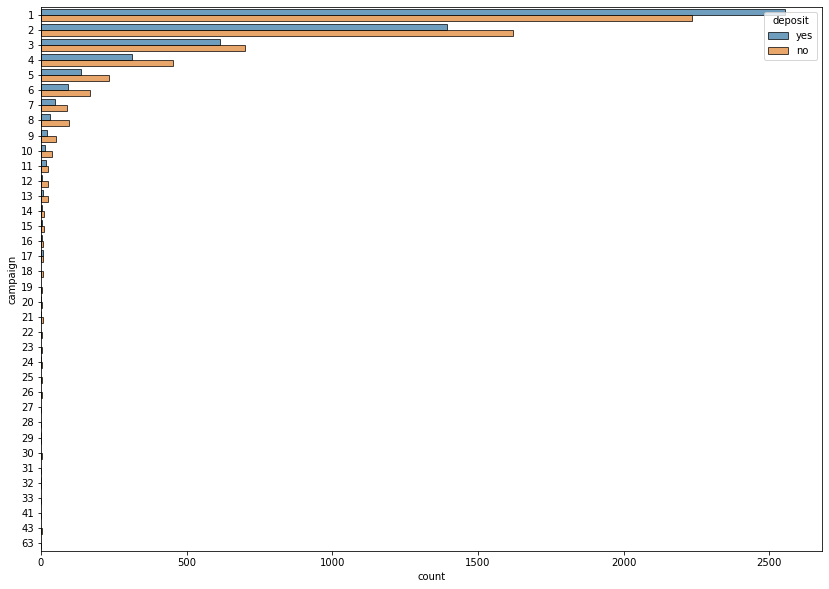

In [23]:
plt.figure(figsize=[14,10])
sns.countplot(y='campaign',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

In [24]:
maxi=Bank['campaign'].quantile(0.995)
maxi

18.0

In [25]:
d=Bank[Bank['campaign']>maxi]
ind=d.index
print(ind)

Int64Index([  563,   618,  1217,  4587,  4912,  5311,  5655,  6052,  6435,
             6644,  6798,  6820,  6904,  6927,  6939,  7024,  7139,  7237,
             7240,  7307,  7587,  7635,  7750,  7763,  7997,  8367,  8408,
             8423,  8428,  8451,  8463,  8541,  8604,  8618,  8806,  9241,
             9255,  9265,  9269,  9388,  9640,  9683, 10096, 10293, 10352,
            10372, 10483, 10771, 10865, 10932, 10960, 10993],
           dtype='int64')


In [26]:
Bank.drop(ind, inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:xlabel='count', ylabel='campaign'>

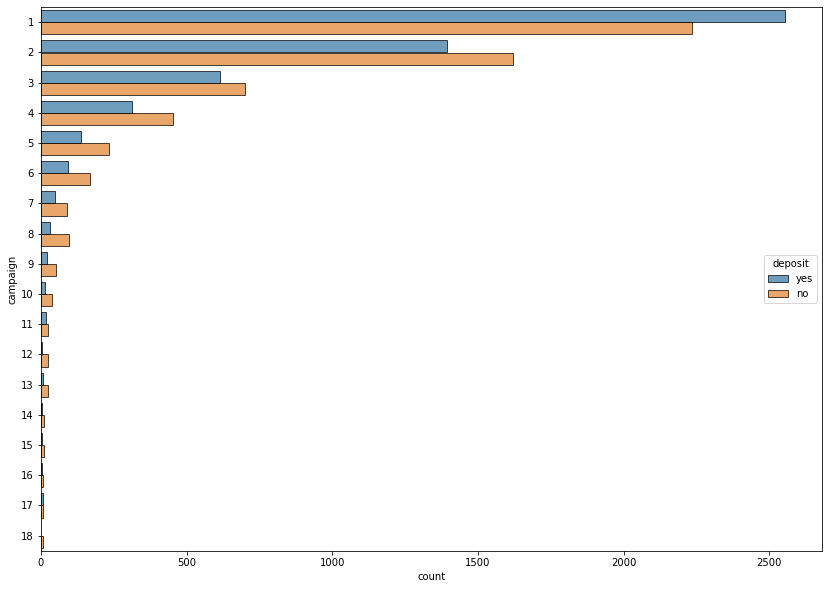

In [27]:
plt.figure(figsize=[14,10])
sns.countplot(y='campaign',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

## Feature reduction

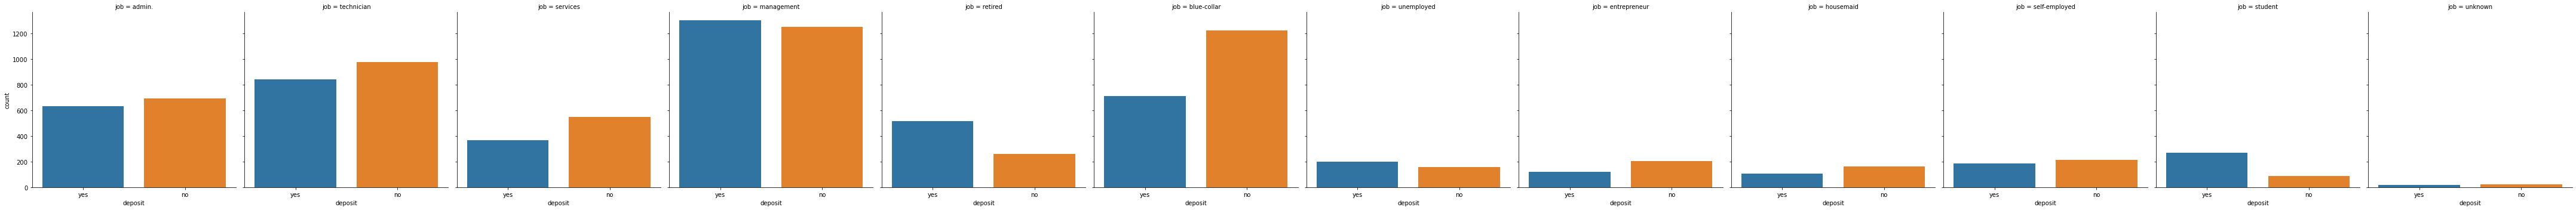

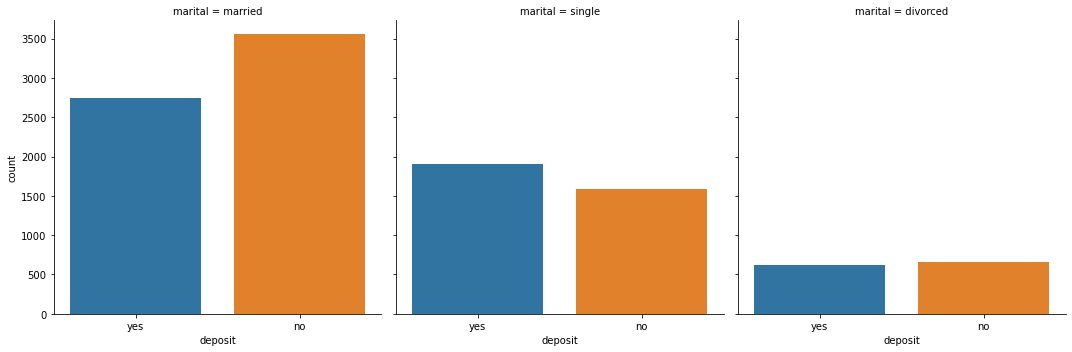

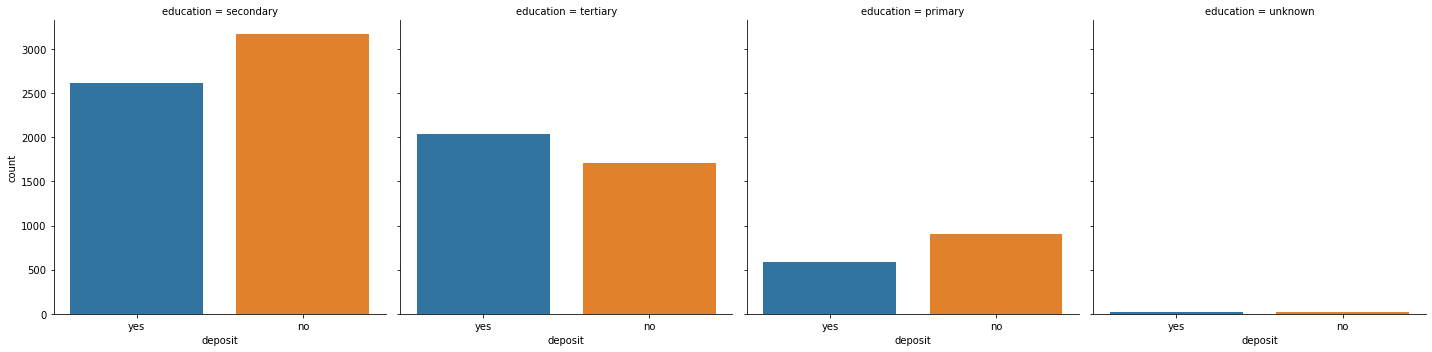

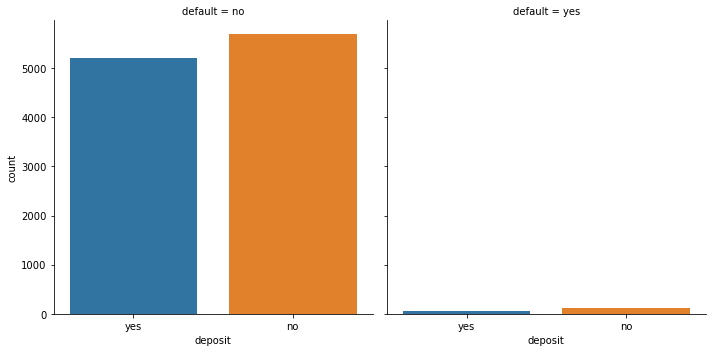

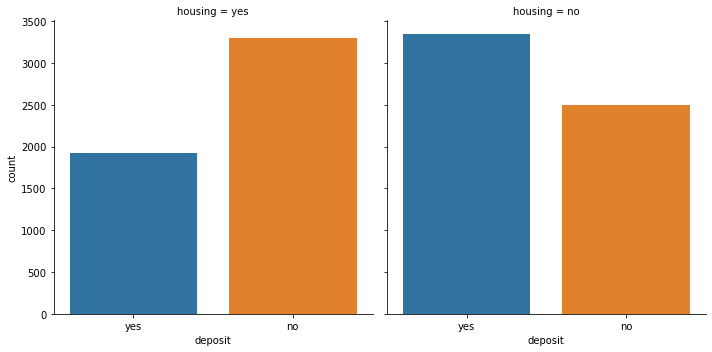

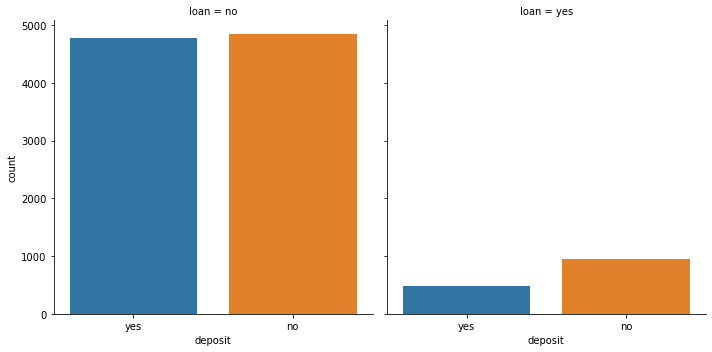

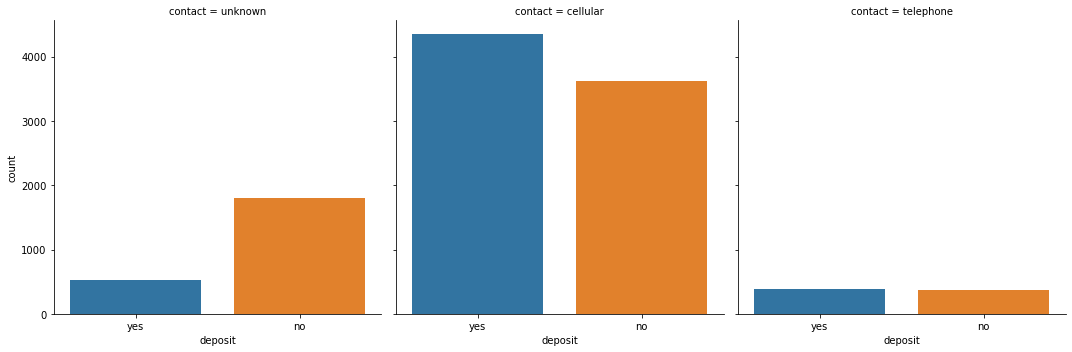

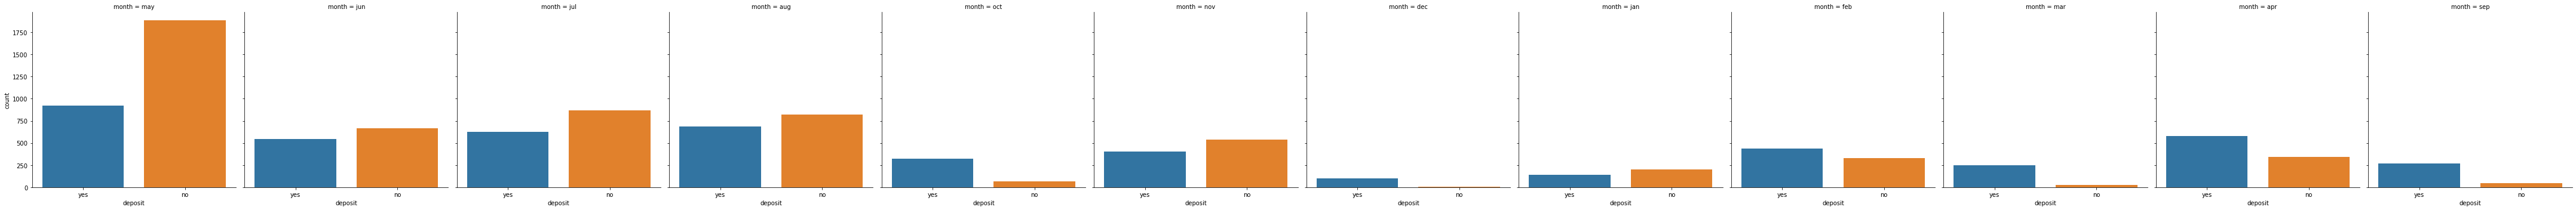

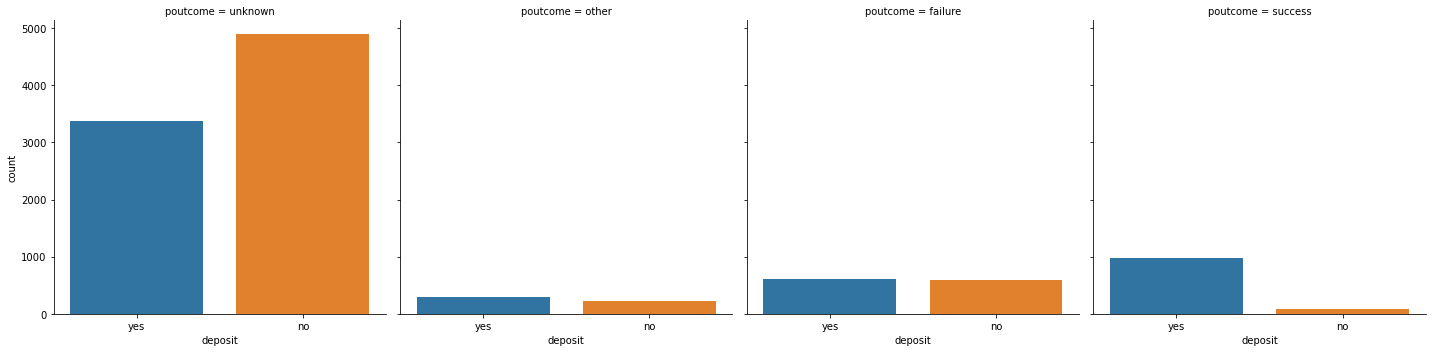

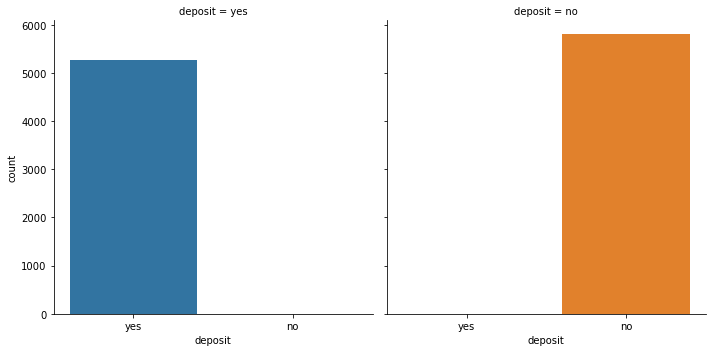

In [28]:

for j in categorical_coln:
    sns.catplot(x='deposit',col=j, kind='count', data=Bank)
plt.show()

In [29]:
for j in categorical_coln:
    print(Bank.groupby(['deposit',j]).size())
    print('-------------')

deposit  job          
no       admin.            694
         blue-collar      1221
         entrepreneur      205
         housemaid         164
         management       1252
         retired           261
         self-employed     214
         services          548
         student            89
         technician        976
         unemployed        155
         unknown            21
yes      admin.            630
         blue-collar       709
         entrepreneur      120
         housemaid         108
         management       1300
         retired           515
         self-employed     187
         services          368
         student           267
         technician        841
         unemployed        201
         unknown            18
dtype: int64
-------------
deposit  marital 
no       divorced     661
         married     3553
         single      1586
yes      divorced     620
         married     2745
         single      1899
dtype: int64
-------------
depos

- From the above graph and details,Default(credit) column can be removed as it is not making difference in term deposit.

In [30]:
Bank.drop(['default'],axis=1,inplace= True)
Bank

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,failure,no


DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:



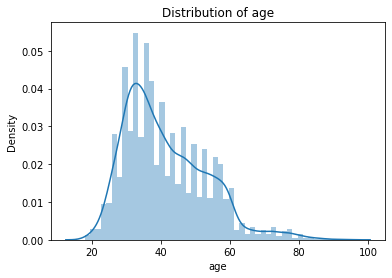

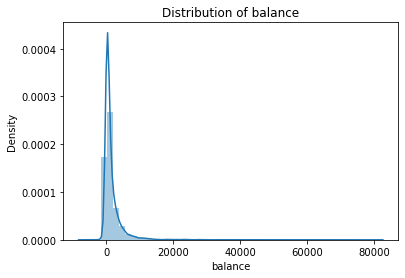

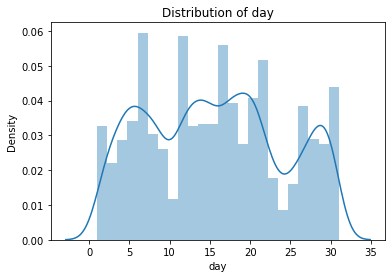

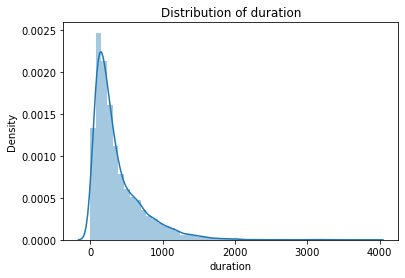

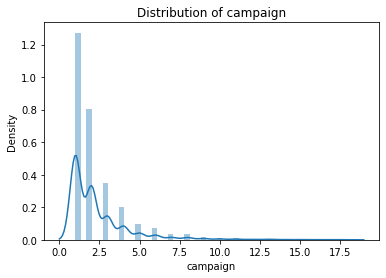

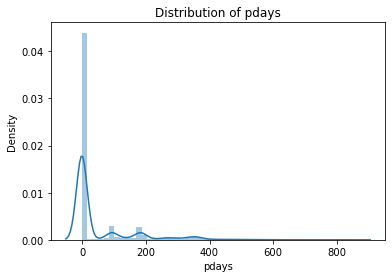

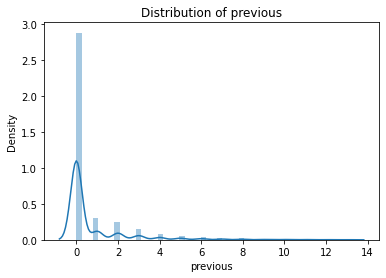

In [31]:


print("DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:\n")
for i in numerical_coln:
    sns.distplot(Bank[i])
    plt.title(f'Distribution of {i}')
    plt.show()

- Days can be removed as last contact month is provided 

In [32]:
Bank.drop(['day'],axis=1,inplace= True)

In [33]:
Bank.head()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,may,673,2,-1,0,unknown,yes


In [34]:
Bank['pdays'].value_counts(normalize=True)

-1      0.747650
 92     0.009490
 182    0.008044
 91     0.007502
 181    0.007231
          ...   
 476    0.000090
 518    0.000090
 828    0.000090
 31     0.000090
 118    0.000090
Name: pdays, Length: 469, dtype: float64

- pdays have around 75% of the value as -1. which has no significant meaning. Therefore we can drop the column

In [35]:
Bank.drop(['pdays'],axis=1,inplace= True)
Bank

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,apr,257,1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,may,9,2,5,failure,no


# Encoding

In [36]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['job']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


4     2552
1     1930
9     1817
0     1324
7      916
5      776
6      401
10     356
8      356
2      325
3      272
11      39
Name: job, dtype: int64


In [37]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['marital']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


1    6298
2    3485
0    1281
Name: marital, dtype: int64


In [38]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['education']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())

    


1    5783
2    3749
0    1493
3      39
Name: education, dtype: int64


In [39]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['contact']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


0    7973
2    2329
1     762
Name: contact, dtype: int64


In [40]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['poutcome']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


3    8274
0    1212
2    1064
1     514
Name: poutcome, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

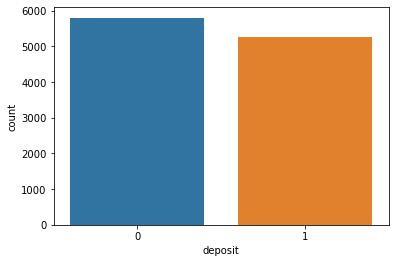

In [41]:

# using simple mapping on binary features.
Bank['deposit'] = Bank['deposit'].apply(lambda x: 1 if x =='yes' else (0 if x =='no' else None))
sns.countplot(Bank['deposit'])


In [42]:
label_encoding = {
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
}

In [43]:
Bank = Bank.replace(label_encoding)

In [44]:
Bank

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,4,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,4,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,4,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,4,579,1,0,3,1
4,54,0,1,2,184,0,0,2,4,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,3,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,5,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,7,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,4,9,2,5,0,0


# EDA

## Univariate Analysis

In [45]:
Bank.describe()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000
mean,41.251446,4.473247,1.199205,1.210954,1530.039949,0.471891,0.129971,0.489877,5.191974,373.415040,2.396602,0.749638,2.482285,0.475777
std,11.928621,3.211771,0.625395,0.665903,3229.256803,0.499232,0.336287,0.819123,2.574256,347.111924,2.145644,1.750776,0.999979,0.499435
min,18.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,123.000000,0.000000,0.000000,0.000000,4.000000,139.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,551.000000,0.000000,0.000000,0.000000,5.000000,256.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1713.250000,1.000000,0.000000,1.000000,7.000000,498.000000,3.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,81204.000000,1.000000,1.000000,2.000000,11.000000,3881.000000,18.000000,13.000000,3.000000,1.000000


In [46]:
# Split the categorical and continuos features
categorical_coln = Bank.select_dtypes('object')
numerical_coln = Bank.select_dtypes('number')

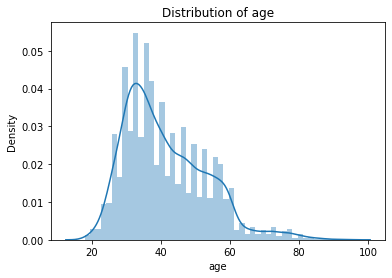

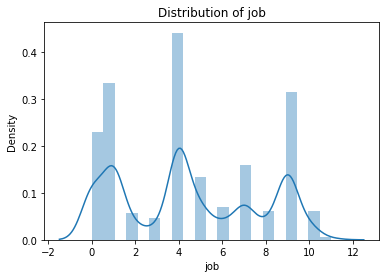

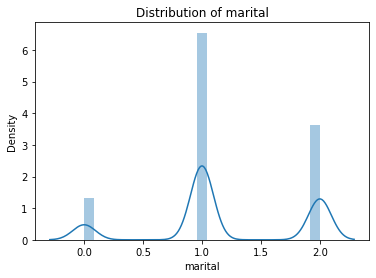

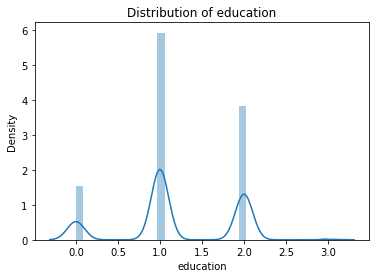

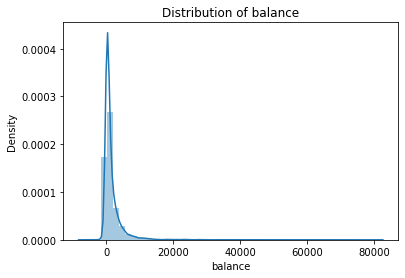

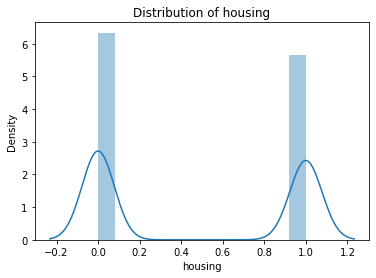

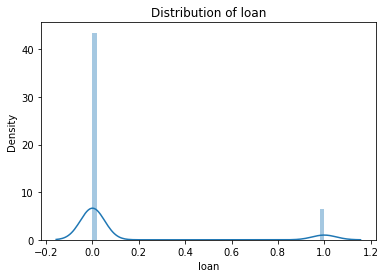

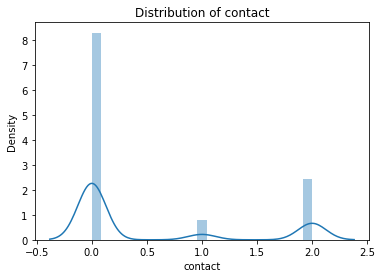

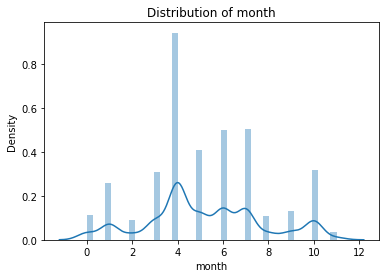

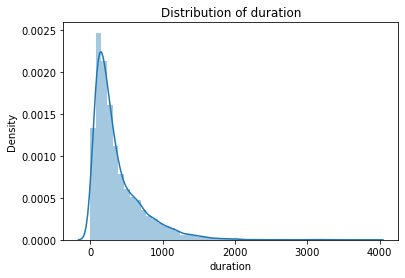

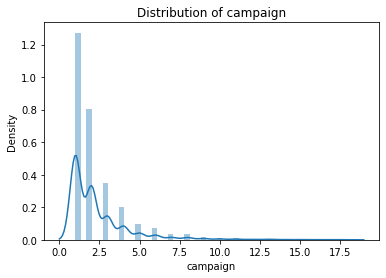

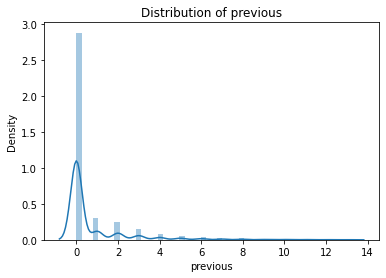

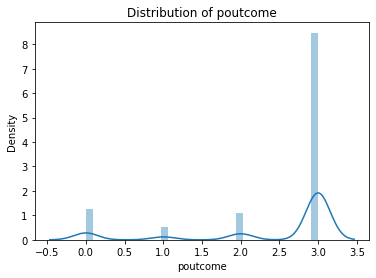

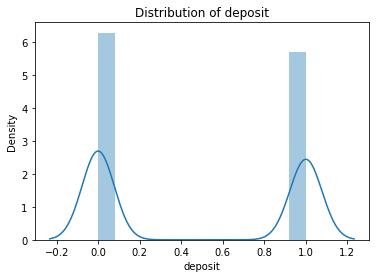

In [47]:
for i in numerical_coln:
    sns.distplot(Bank[i])
    plt.title(f'Distribution of {i}')
    plt.show()

## Bivariate Analysis

<Figure size 1440x2880 with 0 Axes>

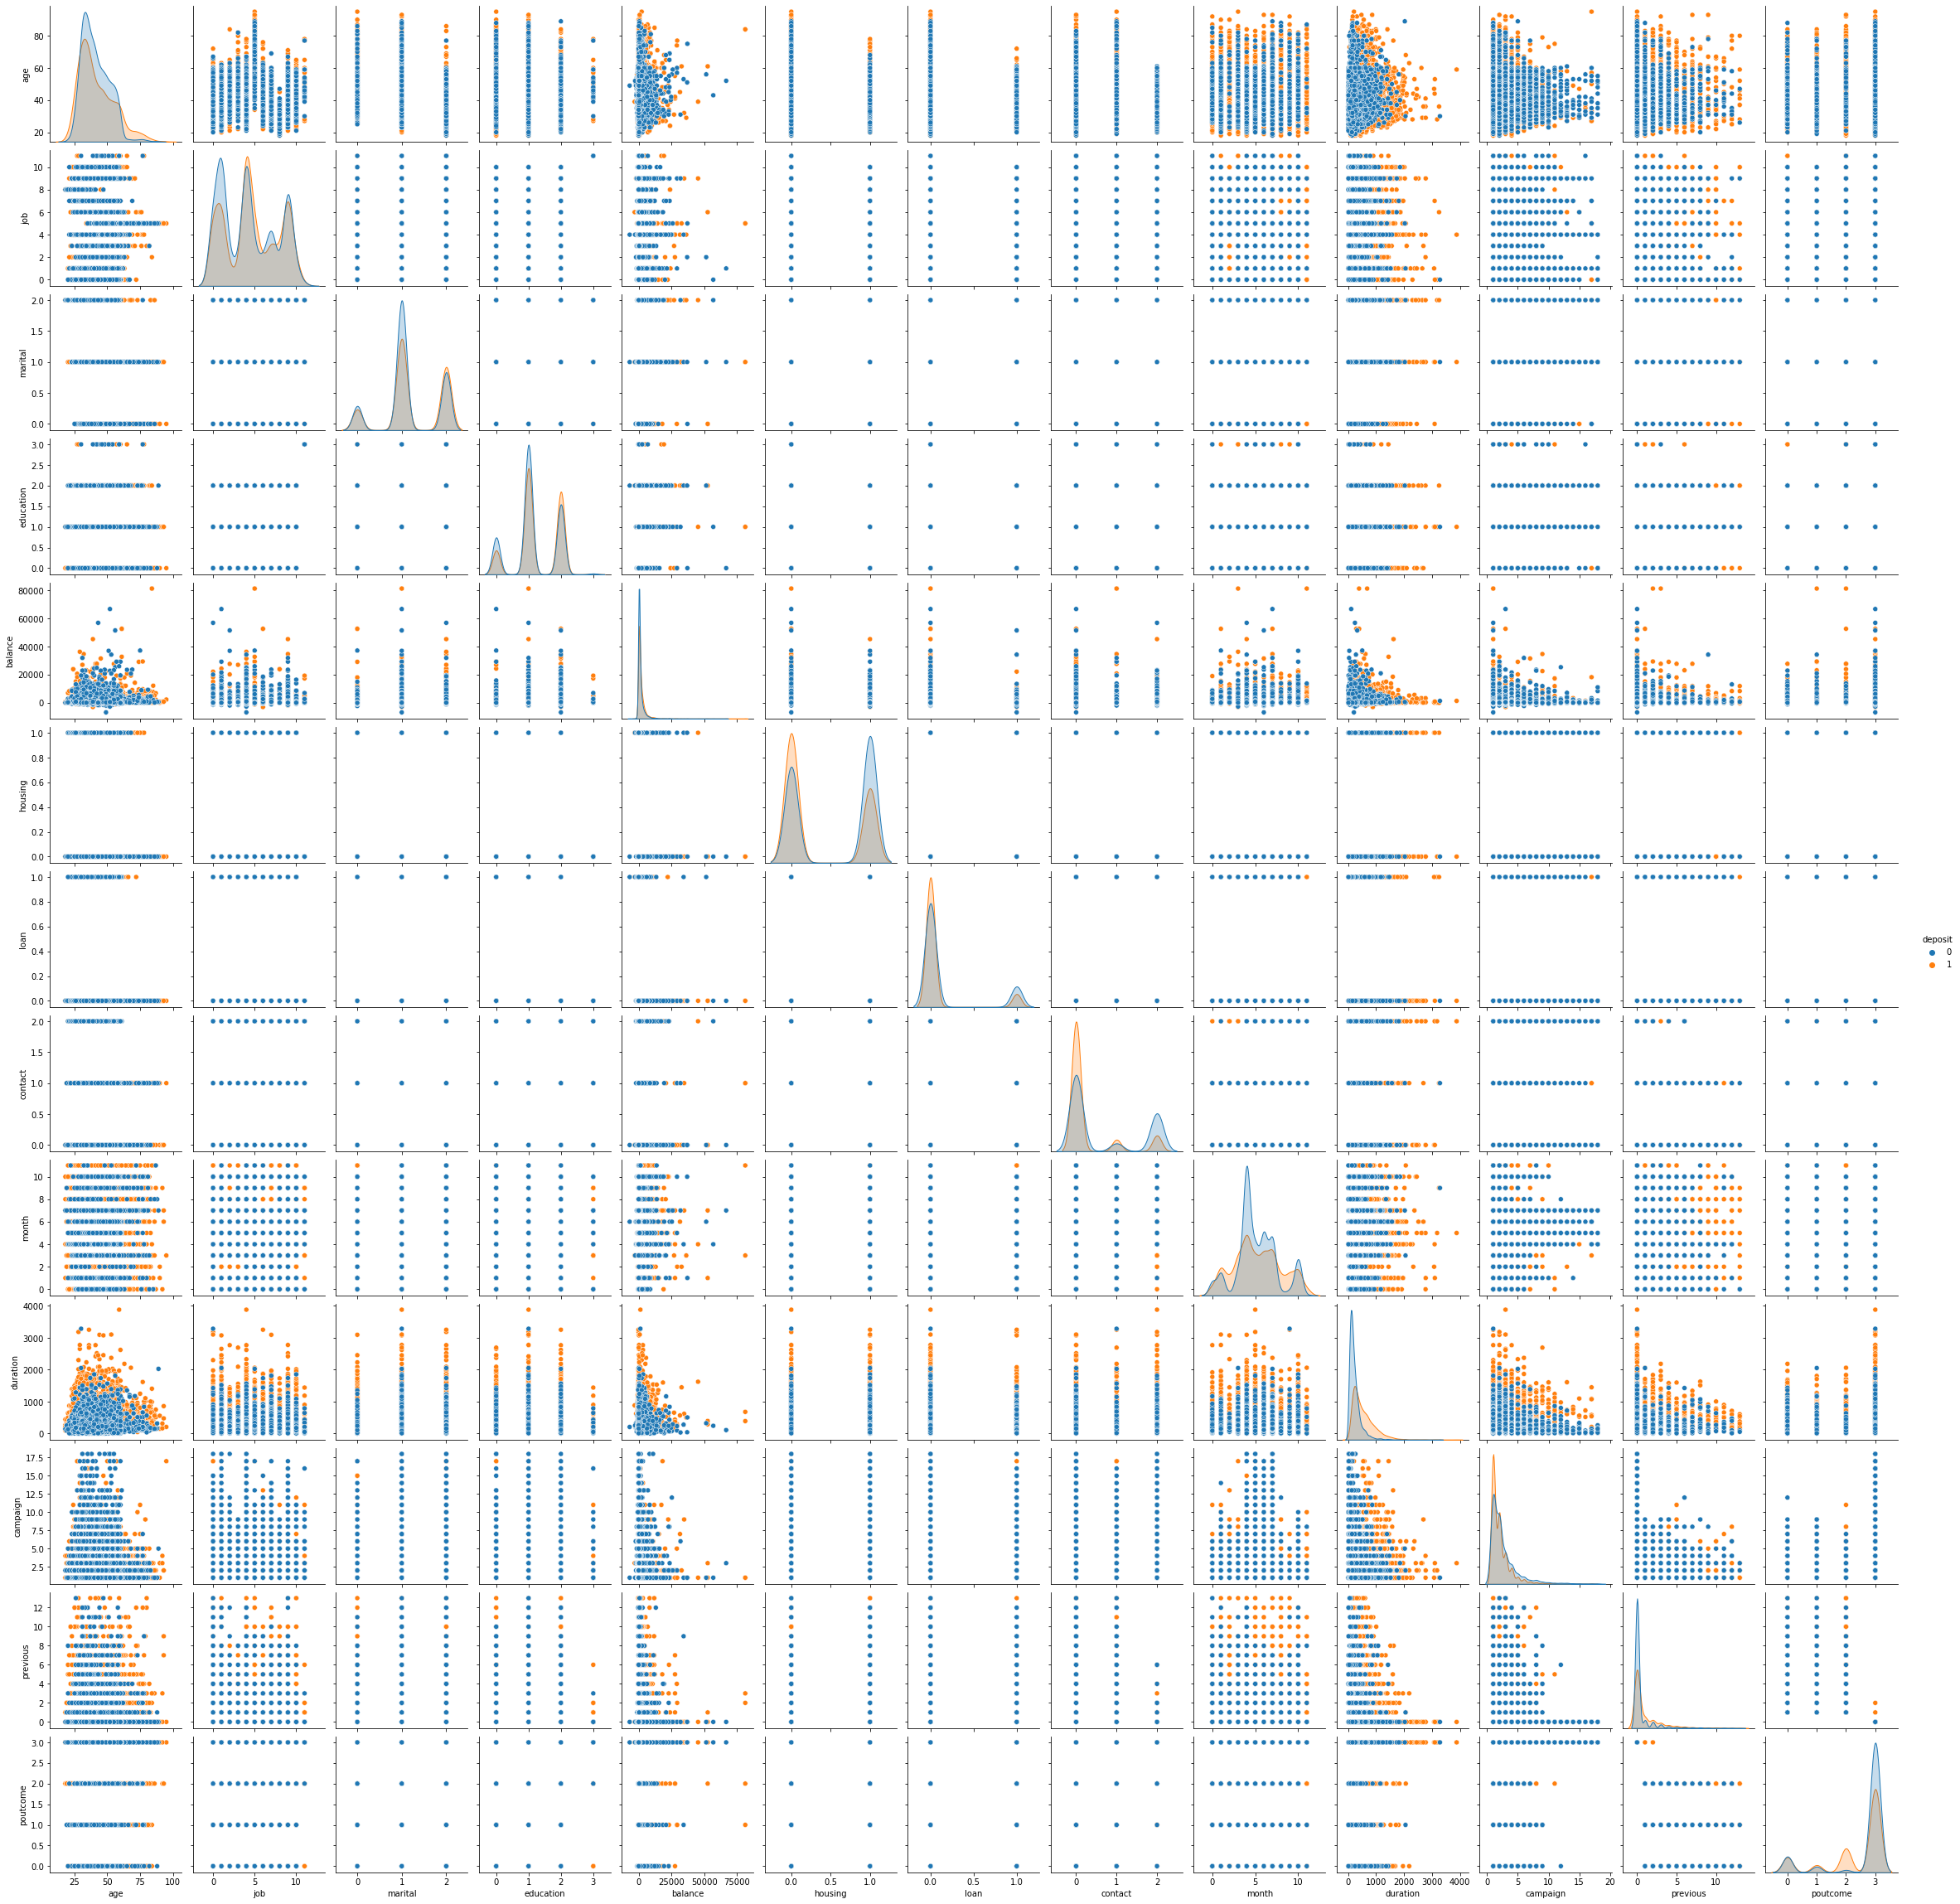

In [48]:
plt.figure(figsize=[20,40])

sns.pairplot(Bank,hue='deposit')

In [49]:
Bank.corr()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
age,1.000000,-0.031994,-0.443084,-0.174675,0.112003,-0.169953,-0.032033,0.027024,0.070123,-0.000116,-0.000312,0.037943,-0.003423,0.034872
job,-0.031994,1.000000,0.078436,0.159312,0.029269,-0.134273,-0.068168,-0.087717,0.022618,0.002464,0.006983,0.015752,-0.004594,0.062653
marital,-0.443084,0.078436,1.000000,0.135669,-0.002232,-0.034176,-0.061227,-0.059056,-0.054131,0.006397,-0.026481,0.027887,-0.037718,0.066673
education,-0.174675,0.159312,0.135669,1.000000,0.053542,-0.100711,-0.059479,-0.157824,0.043868,-0.014818,-0.013707,0.051121,-0.049907,0.101524
balance,0.112003,0.029269,-0.002232,0.053542,1.000000,-0.076324,-0.084006,-0.027273,0.064379,0.022365,-0.013366,0.037338,-0.027337,0.081225
housing,-0.169953,-0.134273,-0.034176,-0.100711,-0.076324,1.000000,0.076143,0.226867,-0.117832,0.036274,-0.007903,-0.020256,-0.043819,-0.204117
loan,-0.032033,-0.068168,-0.061227,-0.059479,-0.084006,0.076143,1.000000,0.006417,0.005946,-0.000808,0.025767,-0.046055,0.027276,-0.109882
contact,0.027024,-0.087717,-0.059056,-0.157824,-0.027273,0.226867,0.006417,1.000000,-0.128452,-0.016868,0.056492,-0.207182,0.257347,-0.250054
month,0.070123,0.022618,-0.054131,0.043868,0.064379,-0.117832,0.005946,-0.128452,1.000000,0.006165,0.044621,0.008499,0.013717,0.027592
duration,-0.000116,0.002464,0.006397,-0.014818,0.022365,0.036274,-0.000808,-0.016868,0.006165,1.000000,-0.017717,-0.030833,0.042595,0.449807


<AxesSubplot:>

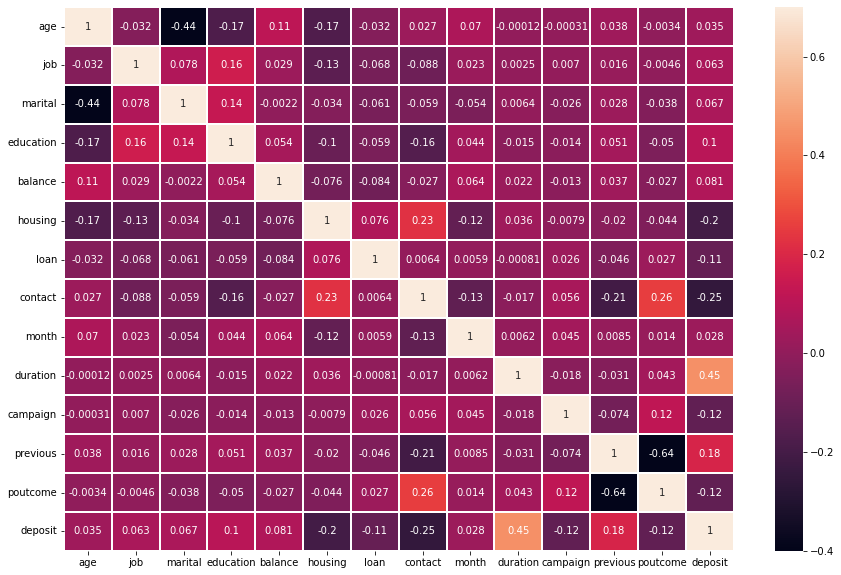

In [50]:
corrmatrix=Bank.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

## Standardisation/Normalisation 

In [51]:
from sklearn import preprocessing

In [52]:
Bank.describe()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000
mean,41.251446,4.473247,1.199205,1.210954,1530.039949,0.471891,0.129971,0.489877,5.191974,373.415040,2.396602,0.749638,2.482285,0.475777
std,11.928621,3.211771,0.625395,0.665903,3229.256803,0.499232,0.336287,0.819123,2.574256,347.111924,2.145644,1.750776,0.999979,0.499435
min,18.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,123.000000,0.000000,0.000000,0.000000,4.000000,139.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,551.000000,0.000000,0.000000,0.000000,5.000000,256.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1713.250000,1.000000,0.000000,1.000000,7.000000,498.000000,3.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,81204.000000,1.000000,1.000000,2.000000,11.000000,3881.000000,18.000000,13.000000,3.000000,1.000000


In [53]:


num_coln=['age', 'balance', 'duration',
       'campaign',  'previous']deposit

In [54]:
scaler =preprocessing. MinMaxScaler(feature_range=(0, 1))

Bank[num_coln] = scaler.fit_transform(Bank[num_coln])

In [57]:
df2 = Bank[num_coln]
df2.describe()

,age,balance,duration,campaign,previous
count,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000
mean,0.301967,0.095138,0.095750,0.082153,0.057664
std,0.154917,0.036675,0.089485,0.126214,0.134675
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.079159,0.035318,0.000000,0.000000
50%,0.272727,0.084019,0.065481,0.058824,0.000000
75%,0.402597,0.097219,0.127868,0.117647,0.076923
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
Bank.describe()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000
mean,0.301967,4.473247,1.199205,1.210954,0.095138,0.471891,0.129971,0.489877,5.191974,0.095750,0.082153,0.057664,2.482285,0.475777
std,0.154917,3.211771,0.625395,0.665903,0.036675,0.499232,0.336287,0.819123,2.574256,0.089485,0.126214,0.134675,0.999979,0.499435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,1.000000,1.000000,1.000000,0.079159,0.000000,0.000000,0.000000,4.000000,0.035318,0.000000,0.000000,2.000000,0.000000
50%,0.272727,4.000000,1.000000,1.000000,0.084019,0.000000,0.000000,0.000000,5.000000,0.065481,0.058824,0.000000,3.000000,0.000000
75%,0.402597,7.000000,2.000000,2.000000,0.097219,1.000000,0.000000,1.000000,7.000000,0.127868,0.117647,0.076923,3.000000,1.000000
max,1.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,1.000000,1.000000,1.000000,3.000000,1.000000


# Modelling

In [60]:
y=Bank['deposit']
X=Bank.drop('deposit',axis=1)

In [61]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
X_train.shape

(8851, 13)

## Logistic Regression

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train,y_train)
y_pre=logit_model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.8084048802530501
f1_score is: 0.8084048802530501


In [69]:
confusion_matrix(y_test, y_pre)

array([[970, 198],
       [226, 819]], dtype=int64)

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pre=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_values.append(acc)

In [77]:
acc_values

[0.7794848621780388,
 0.7677361048350655,
 0.7907817442385902,
 0.7867148666967917,
 0.7980117487573429,
 0.7925892453682784,
 0.7989154993221871,
 0.7853592408495256,
 0.7980117487573429,
 0.7962042476276547,
 0.8002711251694532,
 0.7943967464979665]

Text(0, 0.5, 'acccuracy')

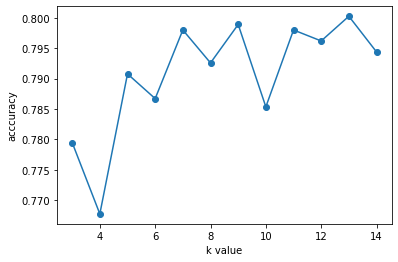

In [78]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')

In [79]:
Classifier = KNeighborsClassifier(n_neighbors=13,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pre=Classifier.predict(X_test)

In [80]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.8002711251694532
f1_score is: 0.8002711251694532


In [81]:
confusion_matrix(y_test, y_pre)

array([[973, 195],
       [247, 798]], dtype=int64)

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
y_pre = RF.predict(X_test)

In [83]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.8359692724807953
f1_score is: 0.8359692724807953


In [84]:
confusion_matrix(y_test, y_pre)

array([[986, 182],
       [181, 864]], dtype=int64)

## Kernal SVM

In [86]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)

In [87]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.8124717577948486
f1_score is: 0.8124717577948486


In [88]:
confusion_matrix(y_test, y_pre)

array([[965, 203],
       [212, 833]], dtype=int64)

## DecisionTreeClassifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pre=dt_model.predict(X_test)

In [92]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.772254857659286
f1_score is: 0.772254857659286


In [93]:
confusion_matrix(y_test, y_pre)

array([[924, 244],
       [260, 785]], dtype=int64)